<a href="https://colab.research.google.com/github/lampedepoche/ML-NN---Final-project/blob/main/Notebook_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. LIBRARY IMPORT

In [1]:
import pandas as pd
import numpy as np
from numpy import mean, median, std

from statistics import mode

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  # Just to ignore user warnings and copy warnings

from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, GroupShuffleSplit

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from tabulate import tabulate

from google.colab import files

# 1. DATA CLEANING & EXPLORATION

## Data import

In [2]:
dtypes = {
    "subjectID": "Int64",
    "group_number": "Int64",
    "condition": "category",
    "gender": "category",
    "Synchrony1_with": "Int64",
    "Synchrony2_with": "Int64"
}
columns_selected=['Psychometric', 'subjectID', 'group_number', 'condition', 'Age', 'gender', 'SPIN', 'IRI', 'EC', 'cohesion',
                  'Collective_Efficacy', 'trust', 'Group_CCF_I_Mean', 'SPIN_mean', 'cohesion_mean', 'Collective_Efficacy_mean',
                  'HR', 'RSA', 'RMSSD', 'Synchrony1_with', 'Synchrony1', 'Synchrony2_with', 'Synchrony2', 'Average_Synchrony']

In [3]:
# For Google Colab purposes
uploaded = files.upload()

#loading data, saving original for further use if needed
data = pd.read_csv('Music.csv', dtype=dtypes, usecols=columns_selected)
df_original = pd.DataFrame(data)
# Replace number by explicit string for categorical data
df_original['condition'].replace({'4': 'synchronous', '5': 'asynchronous'}, inplace=True)
df_original['gender'].replace({'1' : 'man', '2': 'woman'}, inplace=True)

# Display
df_original.info()

Saving Music.csv to Music.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Psychometric              152 non-null    float64 
 1   subjectID                 153 non-null    Int64   
 2   group_number              153 non-null    Int64   
 3   condition                 153 non-null    category
 4   Age                       152 non-null    float64 
 5   gender                    153 non-null    category
 6   SPIN                      152 non-null    float64 
 7   IRI                       111 non-null    float64 
 8   EC                        152 non-null    float64 
 9   cohesion                  152 non-null    float64 
 10  Collective_Efficacy       152 non-null    float64 
 11  trust                     152 non-null    float64 
 12  Group_CCF_I_Mean          141 non-null    float64 
 13  SPIN_mean           

In [4]:
# For Google Colab purposes
uploaded = files.upload()

#loading data, saving original for further use if needed
data_imputation = pd.read_csv('Music_imputation.csv', dtype=dtypes)
df_imputation_original=pd.DataFrame(data_imputation)
# Display
df_imputation_original.info()

Saving Music_imputation.csv to Music_imputation.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Psychometric              153 non-null    float64 
 1   subjectID                 153 non-null    Int64   
 2   group_number              153 non-null    Int64   
 3   condition                 153 non-null    category
 4   Age                       153 non-null    float64 
 5   gender                    153 non-null    category
 6   SPIN                      153 non-null    float64 
 7   IRI                       153 non-null    float64 
 8   EC                        153 non-null    float64 
 9   cohesion                  153 non-null    float64 
 10  Collective_Efficacy       153 non-null    float64 
 11  trust                     153 non-null    float64 
 12  Group_CCF_I_Mean          153 non-null    float64 
 13

## Save

In [5]:
# Save
df = df_original.copy()
df_imputation = df_imputation_original.copy()

## Cleaning

In [6]:
# Save
df_cleaned = df.copy()

# Delete samples with na value
df_cleaned.dropna(inplace=True)
# delete the cell == 999
df_cleaned = df_cleaned[~df_cleaned.isin([999]).any(axis=1)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 152
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Psychometric              89 non-null     float64 
 1   subjectID                 89 non-null     Int64   
 2   group_number              89 non-null     Int64   
 3   condition                 89 non-null     category
 4   Age                       89 non-null     float64 
 5   gender                    89 non-null     category
 6   SPIN                      89 non-null     float64 
 7   IRI                       89 non-null     float64 
 8   EC                        89 non-null     float64 
 9   cohesion                  89 non-null     float64 
 10  Collective_Efficacy       89 non-null     float64 
 11  trust                     89 non-null     float64 
 12  Group_CCF_I_Mean          89 non-null     float64 
 13  SPIN_mean                 89 non-null     float64 


In [7]:
#removing Synchrony1, Synchrony2, CCF (as theses features are directly corraletd with Average_Synchrony) and IDs
labels =  ['subjectID', 'Synchrony1_with', 'Synchrony2_with',
           'Group_CCF_I_Mean', 'Synchrony1', 'Synchrony2']
df_cleaned.drop(labels, axis=1, inplace=True)
df_imputation.drop(labels, axis = 1, inplace=True)

print(f'Remaining columns:\n {df_cleaned.columns}')

Remaining columns:
 Index(['Psychometric', 'group_number', 'condition', 'Age', 'gender', 'SPIN',
       'IRI', 'EC', 'cohesion', 'Collective_Efficacy', 'trust', 'SPIN_mean',
       'cohesion_mean', 'Collective_Efficacy_mean', 'HR', 'RSA', 'RMSSD',
       'Average_Synchrony'],
      dtype='object')


## Data exploration

In [8]:
# Merge df for better graphic representation only
df_cleaned['Source'] = 'Complete case'
df_imputation['Source'] = 'Imputed'
df_merged = pd.concat([df_cleaned, df_imputation], ignore_index=True)
df_cleaned.drop('Source', axis=1, inplace=True)
df_imputation.drop('Source', axis=1, inplace=True)

In [9]:
# Colors settings
sns.set(style="ticks", palette="Set2")
palette = sns.color_palette("Set2", n_colors=5)
turquoise, saumon, blue, pink, green = palette

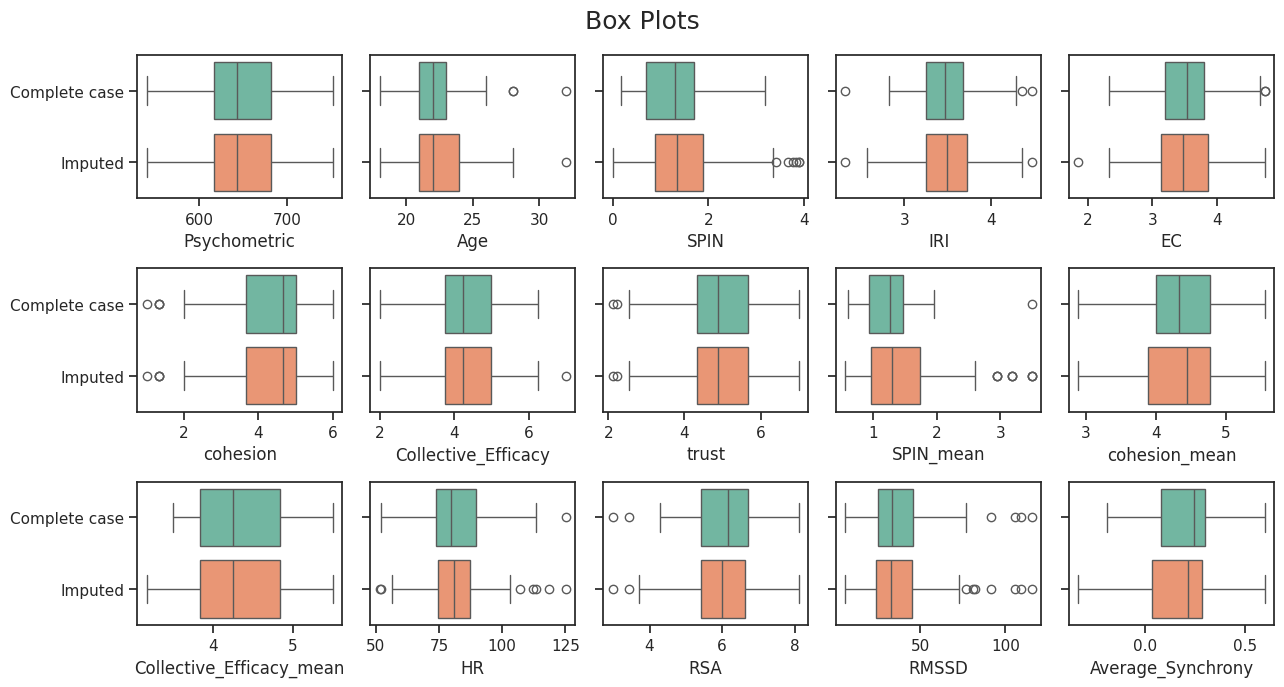

In [10]:
columns_to_plot = ['Psychometric', 'Age', 'SPIN', 'IRI', 'EC',
       'cohesion', 'Collective_Efficacy', 'trust', 'SPIN_mean',
       'cohesion_mean', 'Collective_Efficacy_mean', 'HR', 'RSA', 'RMSSD',
       'Average_Synchrony']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(13, 7), sharey=True)

# Create one boxplot per column in a subplot
for i, (column, ax) in enumerate(zip(columns_to_plot, axes.flatten())):
    sns.boxplot(data=df_merged, x=column, y='Source', hue='Source', ax=ax)
    ax.set_ylabel('')

# Settings
fig.suptitle('Box Plots', fontsize=18)
plt.tight_layout()
plt.show()

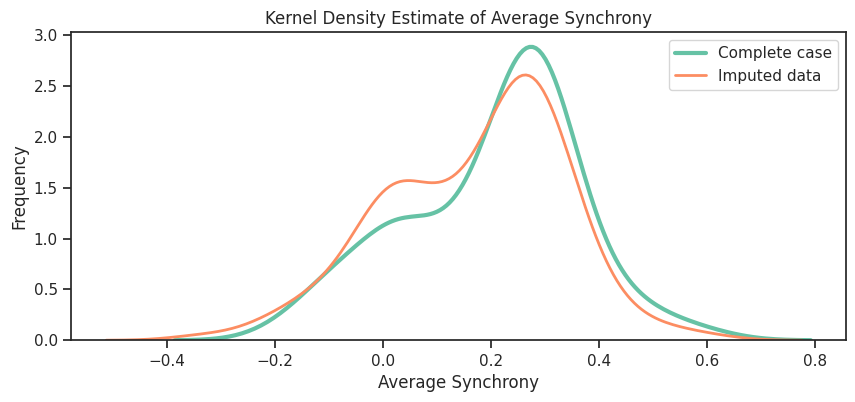

In [11]:
# Histogram of Average_Synchrony values
# Get y_values
density_values = df_cleaned['Average_Synchrony']
density_values_imp = df_imputation['Average_Synchrony']

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Plotting the kernel density estimate (KDE)
sns.kdeplot(density_values, linewidth=3, label='Complete case')
sns.kdeplot(density_values_imp, linewidth=2, label='Imputed data')

# Setting: title, axes and legend
plt.title('Kernel Density Estimate of Average Synchrony')
plt.xlabel('Average Synchrony')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

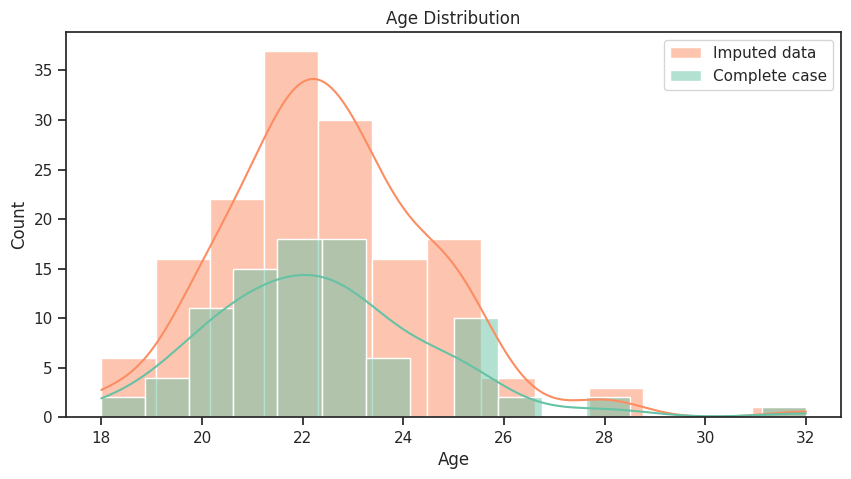

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Plot Age distribution
sns.histplot(data=df_imputation, x='Age', kde=True, multiple="stack", label = 'Imputed data', color=saumon)
sns.histplot(data=df_cleaned, x='Age', kde=True, multiple="stack", label = 'Complete case', color=turquoise)

# Setting: title, axes and legend
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

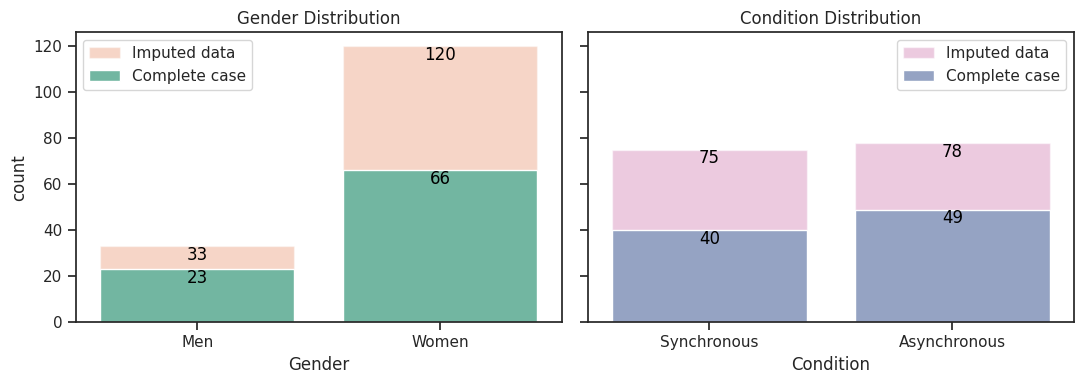

In [13]:
# making gender and condition countings
labels_to_keep = ['gender', 'condition']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4), sharey = True)

# Gender Distribution
sns.countplot(data=df_imputation, x='gender', color=saumon, ax = axes[0], alpha = 0.4, label = 'Imputed data')
sns.countplot(data=df_cleaned, x='gender', color=turquoise, ax = axes[0], label = 'Complete case')
axes[0].legend()
# Adding x-axis labels
axes[0].set_xlabel('Gender')
axes[0].set_xticklabels(['Men', 'Women'])
# Adding subtitle
axes[0].set_title('Gender Distribution')

# Condition Distribution
sns.countplot(data=df_imputation, x='condition', color=pink, ax = axes[1], alpha = 0.5, label = 'Imputed data')
sns.countplot(data=df_cleaned, x='condition', color=blue, ax = axes[1], label = 'Complete case')
axes[1].legend()
# Adding x-axis labels
axes[1].set_xlabel('Condition')
axes[1].set_xticklabels(['Synchronous', 'Asynchronous'])
#Adding subtitle
axes[1].set_title('Condition Distribution')

# Adding counting inside the bars
for ax in axes:
  for p in ax.patches:
      height = p.get_height() if not np.isnan(p.get_height()) else 0
      ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha='center', va='top', color='black')

plt.tight_layout()
plt.show()

In [14]:
#correlation between features and Average_Synchrony
correlation_matrix = df_cleaned.corr()
correlation_with_target = correlation_matrix['Average_Synchrony'].sort_values(ascending=False)

#correlation between features and Average_Synchrony IMPUTED DATA
correlation_matrix_imp = df_imputation.corr()
correlation_with_target_imp = correlation_matrix_imp['Average_Synchrony'].sort_values(ascending=False)

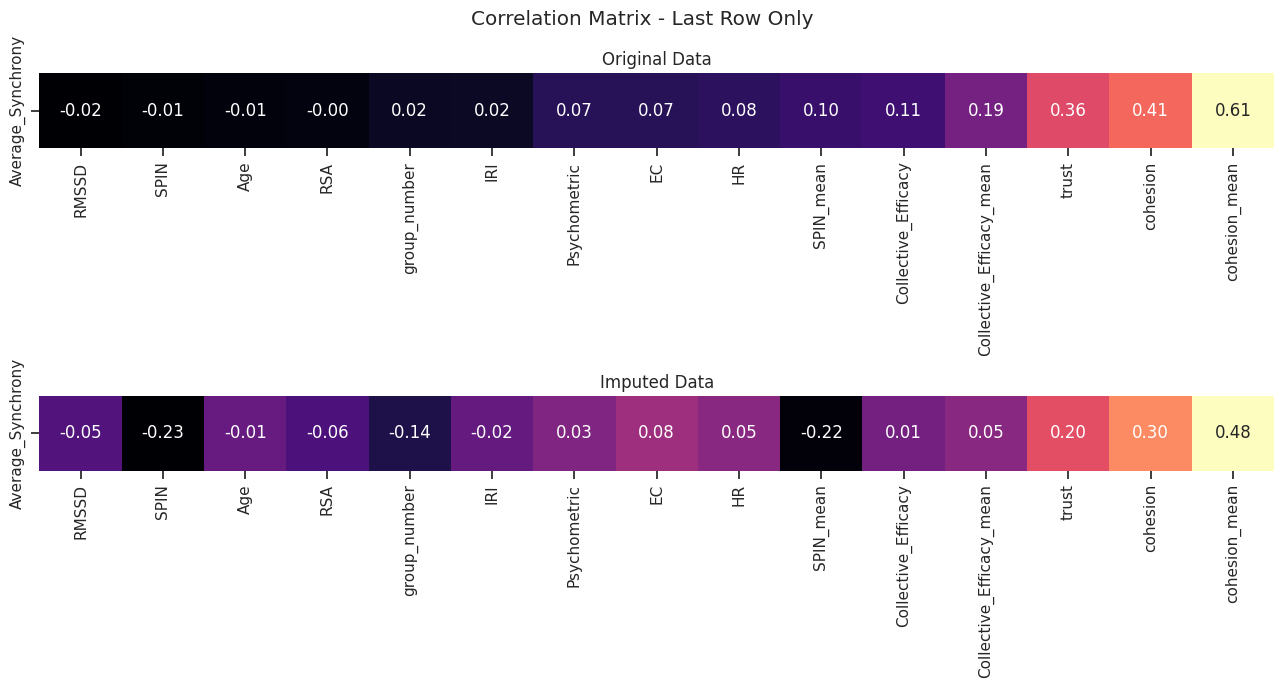

In [15]:
### Heatmap only for Average_Synchrony

## Complete case
# Create a mask to hide the upper triangular part of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Extract the last row of the correlation matrix
last_row = correlation_matrix.iloc[-1, :]

# Create a DataFrame with only the last row
last_row_df = pd.DataFrame(last_row).T
last_row_df = last_row_df.sort_values(by=last_row_df.columns[-1], ascending=True, axis=1)

## Imputed data
# Create a mask to hide the upper triangular part of the matrix
mask_imp = np.triu(np.ones_like(correlation_matrix_imp, dtype=bool))
# Extract the last row of the correlation matrix
last_row_imp = correlation_matrix_imp.iloc[-1, :]
# Create a DataFrame with only the last row
last_row_df_imp = pd.DataFrame(last_row_imp).T
last_row_df_imp = last_row_df_imp[last_row_df.columns]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 7), sharey = True)

# Create a heatmap for the last row
sns.heatmap(last_row_df.iloc[:, :-1], annot=True, cmap='magma', fmt=".2f", ax = axes[0], cbar=False)
sns.heatmap(last_row_df_imp.iloc[:, :-1], annot=True, cmap='magma', fmt=".2f", ax = axes[1], cbar=False)

axes[0].set_title('Original Data')
axes[1].set_title('Imputed Data')
plt.suptitle("Correlation Matrix - Last Row Only")

plt.tight_layout()
plt.show()

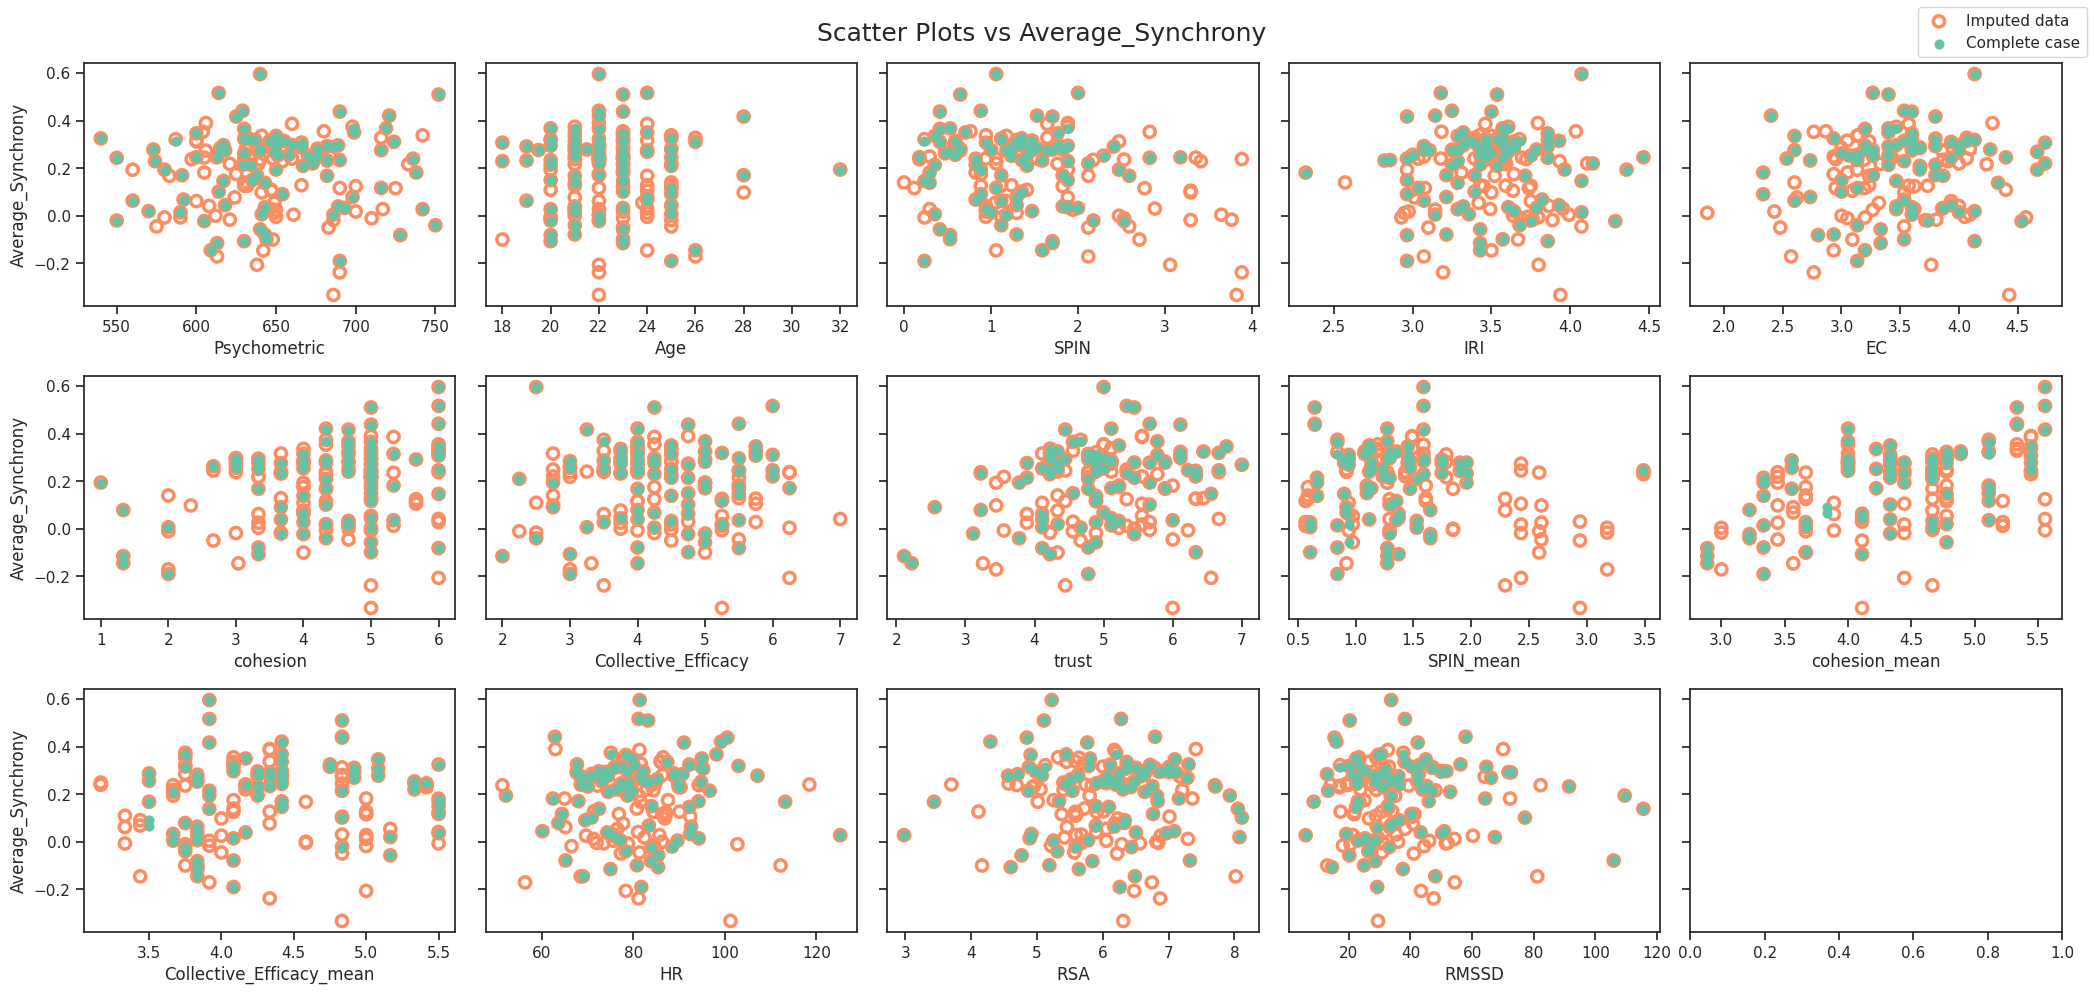

In [16]:
# Pairplot only for Average_Synchrony

# Create a pair plot
labels = ['gender', 'condition', 'group_number']
df_features = df_cleaned.drop(labels, axis=1)
df_features_imp = df_imputation.drop(labels, axis=1)

# Set up subplots in a 2x5 grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(21, 10), sharey = True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create scatter plots for each column against 'Average_Synchrony'
for i, column in enumerate(df_features.columns):
    if column != 'Average_Synchrony':
        sns.scatterplot(data=df_features_imp, x=column, y='Average_Synchrony', ax=axes[i],
                        label = 'Imputed data', legend=False, facecolor='none', edgecolor=saumon, s=65, linewidth=2.5)
        sns.scatterplot(data=df_features, x=column, y='Average_Synchrony', ax=axes[i],
                        label = 'Complete case', legend=False, s=45, edgecolor=None)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Average_Synchrony')


# Display legend outside of the subplots
fig.legend(labels=['Imputed data', 'Complete case'], loc='upper right')

fig.suptitle('Scatter Plots vs Average_Synchrony', fontsize = 18)
plt.tight_layout()
plt.show()

# 2. MACHINE LEARNING REGRESSION

## 2.1 Simple Cross-Validation

### 2.1.a Functions

##### Plotting functions

In [17]:
def plot_learning_curves(best_model_fitted, model_name):
  # Define the training set sizes for which training curves will be plotted
  gss_learning_curve = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
  train_sizes, train_scores, test_scores = learning_curve(best_model_fitted, X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10),
                                                          scoring='neg_mean_squared_error',  cv=gss_learning_curve, groups=all_groups)

  # Calculate means and standard deviations of learning and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curves
  plt.figure(figsize=(9, 3))
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color=blue)
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color=pink)
  plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score", color=blue)
  plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score", color=pink)

  # Plot settings
  plt.xlabel("Training set size")
  plt.ylabel("Negative Mean Squared error")
  plt.title("Learning curves - "+ model_name)
  plt.legend(loc="best")
  plt.show()

In [18]:
def plot_residuals(y_pred, model_name):
  plt.figure(figsize=(6, 3))
  residuals = y_test - y_pred
  # Plot the residuals
  plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
  plt.scatter(y_pred, residuals)
  # Plot settings
  plt.xlabel("Predicted Values")
  plt.ylabel("Residuals")
  plt.title(f"{model_name}: Residual Plot")
  plt.show()

In [19]:
def sort_feature_importance(best_model_fitted):
  # Sort feature names and importance scores
  result = permutation_importance(best_model_fitted, X_train, y_train, n_repeats=10, random_state=0)
  importance = result.importances_mean
  sorted_indices = importance.argsort()[::-1]

  return importance[sorted_indices], np_feature_names[sorted_indices]

In [20]:
def plot_features_importance(best_model_fitted, model_name):
  sorted_importance, sorted_feature_names = sort_feature_importance(best_model_fitted)

  # Plot permutation importances
  plt.figure(figsize=(15, 7))
  plt.bar(range(len(sorted_feature_names)), sorted_importance, align="center")
  plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=45, ha="right")
  plt.xlabel("Feature")
  plt.ylabel("Permutation Importance")
  plt.title(f"{model_name}: Permutation Importances of Features")
  plt.tight_layout()
  plt.show()

In [21]:
def plot_regression_curves(y_pred, best_model_fitted, model_name, ax):
  _, sorted_feature_names = sort_feature_importance(best_model_fitted)
  main_feature = sorted_feature_names[0]

  # Get predictions in a DataFrame
  df_predictions = pd.DataFrame({main_feature: X_test[main_feature], 'Average_Synchrony': y_pred})
  df_predictions = df_predictions.sort_values(by=main_feature)

  # Regression cuves
  ax.scatter(X_test[main_feature], y_test, label='True values')
  ax.plot(df_predictions[main_feature], df_predictions['Average_Synchrony'], label='Model prediction', color=saumon)
  ax.set_title('Regression curve')
  ax.set_xlabel(main_feature)
  ax.set_ylabel('Average_Snychrony')

In [22]:
def actual_predict_plot(y_pred, best_model_fitted, model_name):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

  # Set a threshold for considering values as "more or less the same"
  threshold = 0.1

  green_count = 0
  # Create a scatter plot of predicted vs actual values
  for actual, pred in zip(y_test, y_pred):
      # Check if the absolute difference is below the threshold
      if np.abs(actual - pred) <= threshold:
          color = green
          green_count += 1
      else:
          color = pink
      axes[0].scatter(actual, pred, color=color)

  # Plot the threshold limits
  mini = min(y_test)+0.05
  maxi = max(y_test)-0.05
  x_top = np.linspace(mini, maxi-threshold*2, 3)
  x_bottom = np.linspace(mini+threshold*2, maxi, 3)
  threshold_top = x_top + threshold
  threshold_bottom = x_bottom - threshold
  axes[0].plot(x_top, threshold_top, '--', color=green, linewidth=0.4)
  axes[0].plot(x_bottom, threshold_bottom, '--', color=green, linewidth=0.4, label='threshold')

  # Calculate the percentage of green points
  total_points = len(y_test)
  percentage_green = (green_count / total_points) * 100

  # Sublot settings
  axes[0].set_xlabel("Actual Values")
  axes[0].set_ylabel("Predicted Values")
  axes[0].set_title("{}: Actual vs Predicted Values\nPercentage of Green Points: {:.2f}%".format(model_name, percentage_green))

  plot_regression_curves(y_pred, best_model_fitted, model_name, axes[1])

  plt.legend()
  plt.show()

#### Preprocessing functions

In [23]:
# Removal of two features that drastically reduce model performance
df_cleaned.drop(['SPIN_mean', 'condition'], axis=1, inplace=True)
df_imputation.drop(['SPIN_mean', 'condition'], axis=1, inplace=True)

numeric_columns = ['Psychometric', 'Age', 'SPIN', 'IRI', 'cohesion', 'Collective_Efficacy', 'EC',
                   'trust', 'HR', 'RSA', 'RMSSD', 'Collective_Efficacy_mean', 'cohesion_mean']
categorical_columns = ['gender']

In [24]:
# Create a preprocessor that applies normalization to numeric columns and encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

In [25]:
def convert_to_df(X_train, X_test, X_scaled):
    # Convert to DataFrame
    X_train = pd.DataFrame(X_train, columns=np_feature_names)
    X_test = pd.DataFrame(X_test, columns=np_feature_names)
    X_scaled = pd.DataFrame(X_scaled, columns=np_feature_names)
    all_groups = X_scaled['remainder__group_number']
    groups= X_train['remainder__group_number']
    X_train.drop(['remainder__group_number'], axis=1, inplace=True)
    X_test.drop(['remainder__group_number'], axis=1, inplace=True)

    return X_train, X_test, groups, X_scaled, all_groups

In [26]:
def group_split_data(dataset):
  # Dataset with complete cases
  X = dataset.drop(['Average_Synchrony'], axis=1)
  y = dataset['Average_Synchrony']

  # Split the dataset before preprocessing (groups are not shared between sets to avoid data leakage)
  gss_outer = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

  for train_index, test_index in gss_outer.split(X, y, groups=X['group_number']):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Create a pipeline
  pipeline_cc = Pipeline([
      ('preprocessor', preprocessor)
  ])

  # Apply the pipeline
  X_train = pipeline_cc.fit_transform(X_train)
  X_test = pipeline_cc.transform(X_test)
  X_scaled = pipeline_cc.fit_transform(X)

  # Get the names of the features
  np_feature_names = np.array(pipeline_cc.named_steps['preprocessor'].get_feature_names_out())

  # Convert to DataFrame
  X_train = pd.DataFrame(X_train, columns=np_feature_names)
  X_test = pd.DataFrame(X_test, columns=np_feature_names)
  X_scaled = pd.DataFrame(X_scaled, columns=np_feature_names)
  all_groups = X_scaled['remainder__group_number']
  groups= X_train['remainder__group_number']
  X_train.drop(['remainder__group_number'], axis=1, inplace=True)
  X_test.drop(['remainder__group_number'], axis=1, inplace=True)

  return X_train, X_test, y_train, y_test, groups, X_scaled, y, all_groups, np_feature_names

### 2.1.b Complete case

#### Preprocessing

In [44]:
X_train, X_test, y_train, y_test, groups, X_scaled, y, all_groups, np_feature_names = group_split_data(df_cleaned)

#### Models training

In [45]:
gss_inner = GroupShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

##### Ridge Regression

In [46]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100, 1000, 10000]}
rr = Ridge()

# Create a GridSearchCV object
grid_search_rr = GridSearchCV(estimator=rr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=gss_inner)

# Fit the GridSearchCV object to the data
grid_search_rr.fit(X_train, y_train, groups=groups)

# Get the best parameters from the grid search
best_params_rr = grid_search_rr.best_params_

# Create a new model with the best parameters
best_rr = Ridge(**best_params_rr)
print(f'Best Parameters: {best_params_rr}')

Best Parameters: {'alpha': 100}


In [47]:
# Fit the Ridge Regression
best_rr.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred_rr = best_rr.predict(X_test)

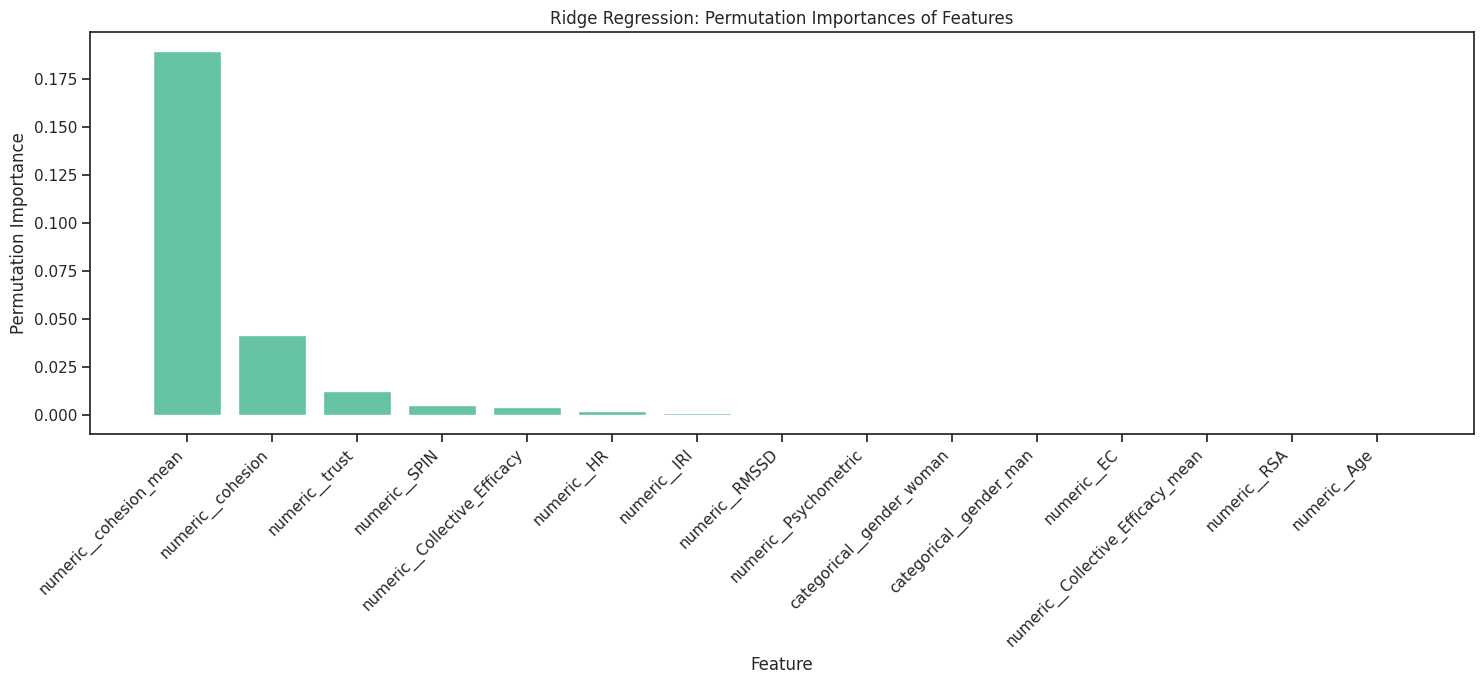

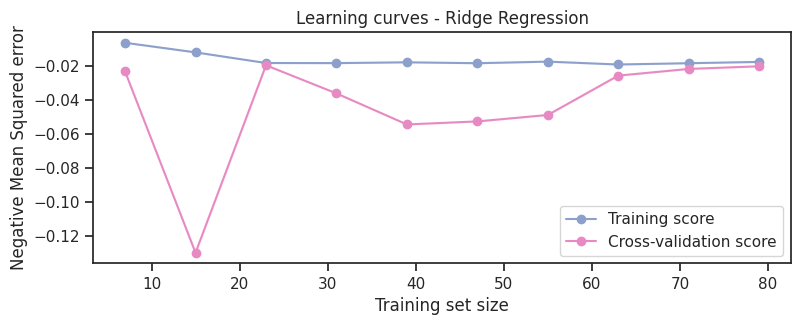

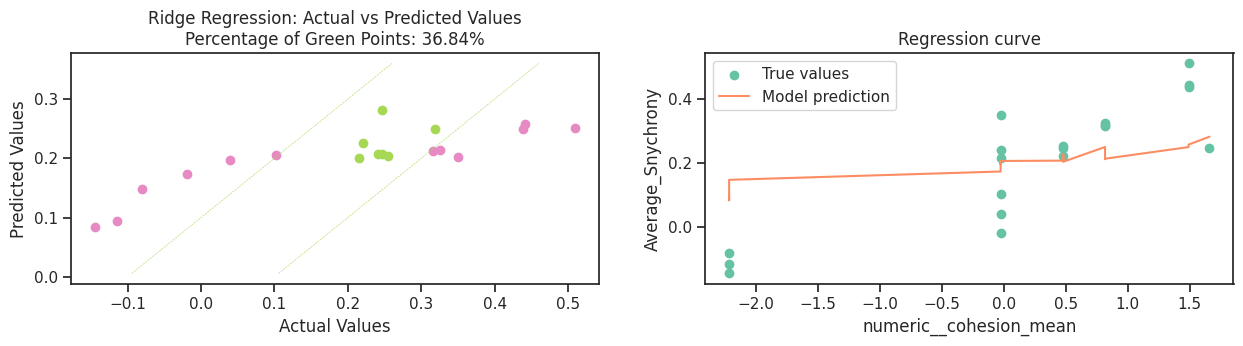

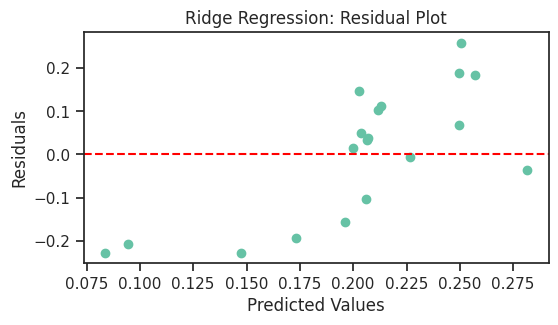

In [48]:
plot_features_importance(best_rr, 'Ridge Regression')
plot_learning_curves(best_rr, 'Ridge Regression')
actual_predict_plot(y_pred_rr, best_rr, 'Ridge Regression')
plot_residuals(y_pred_rr, 'Ridge Regression')

##### Support Vector Regression

In [49]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [0, 1, 2, 3],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=gss_inner)
grid_search_svr.fit(X_train, y_train, groups=groups)

best_svr = grid_search_svr.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_svr.best_params_)

Best Parameters: {'C': 0.01, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [50]:
# Fit the svr
best_svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = best_svr.predict(X_test)

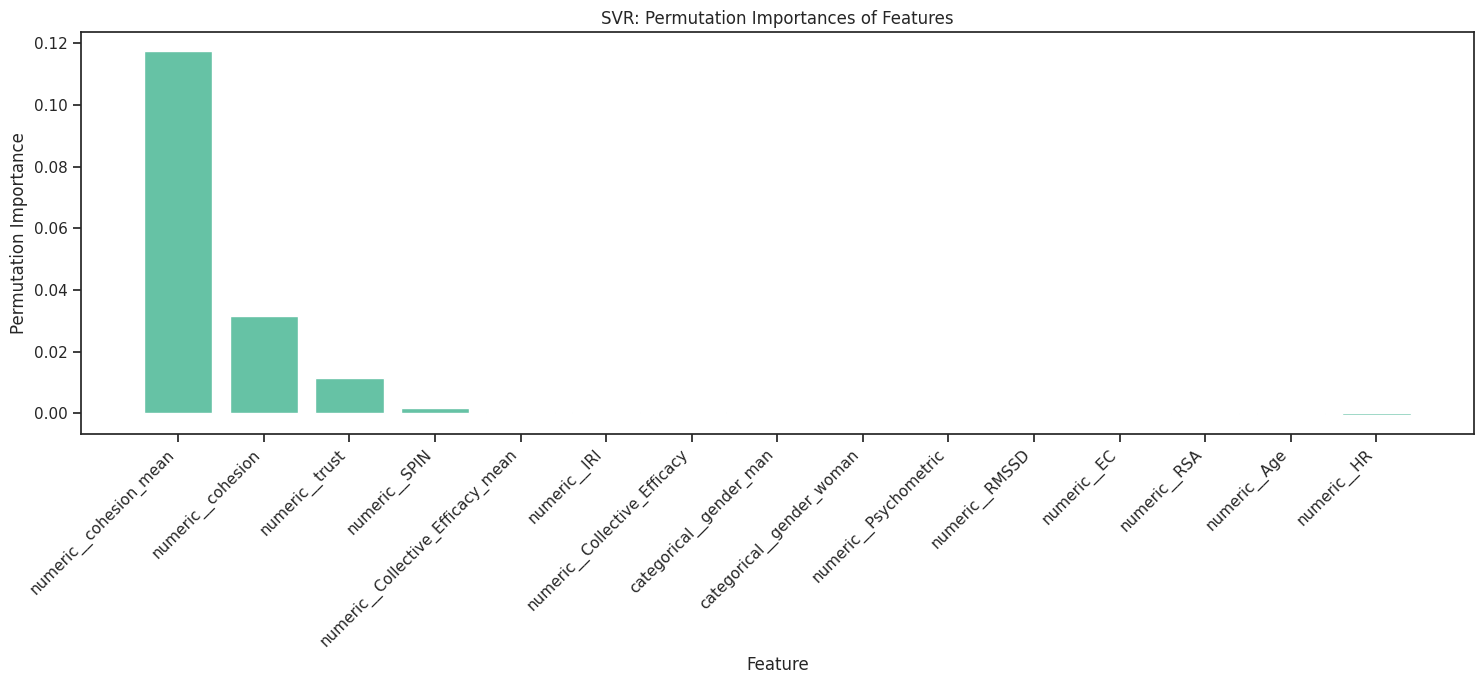

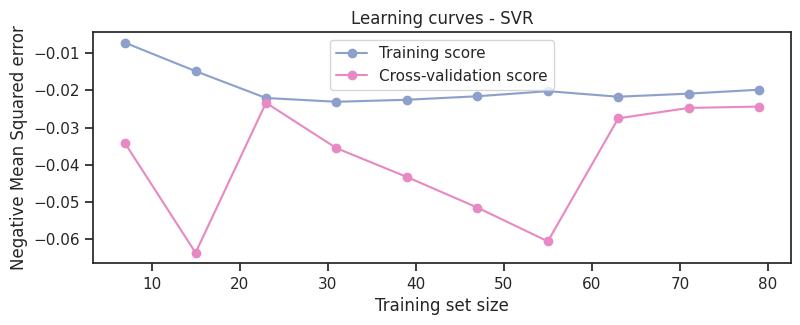

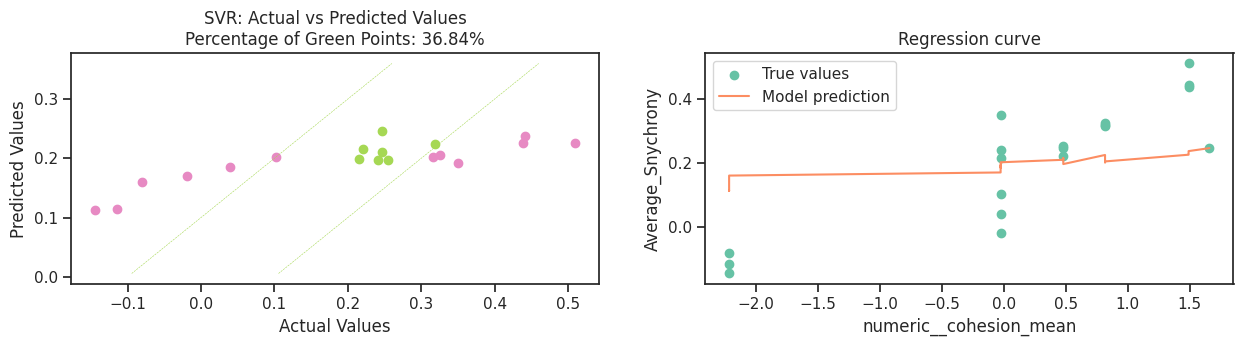

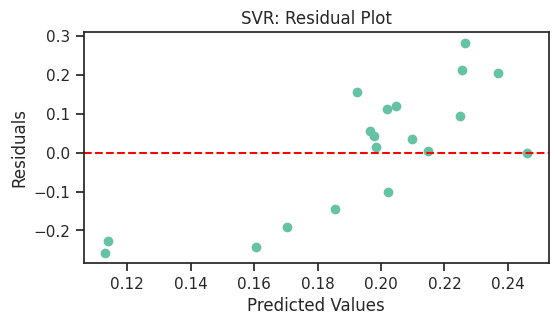

In [51]:
plot_features_importance(best_svr, 'SVR')
plot_learning_curves(best_svr, 'SVR')
actual_predict_plot(y_pred_svr, best_svr, 'SVR')
plot_residuals(y_pred_svr, 'SVR')

##### ElasticNet Regression

In [52]:
# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 0.5, 1],
              'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
              }
elastic_net = ElasticNet()

# Tune parameters
grid_search_EN = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=gss_inner)
grid_search_EN.fit(X_train, y_train, groups=groups)

# Get the best parameters from the grid search
best_params_EN = grid_search_EN.best_params_
print(f'Best Parameters: {best_params_EN}')

Best Parameters: {'alpha': 0.01, 'l1_ratio': 1}


In [53]:
# Train with the best parameters
best_EN = grid_search_EN.best_estimator_
best_EN.fit(X_train, y_train)
y_pred_EN = best_EN.predict(X_test)

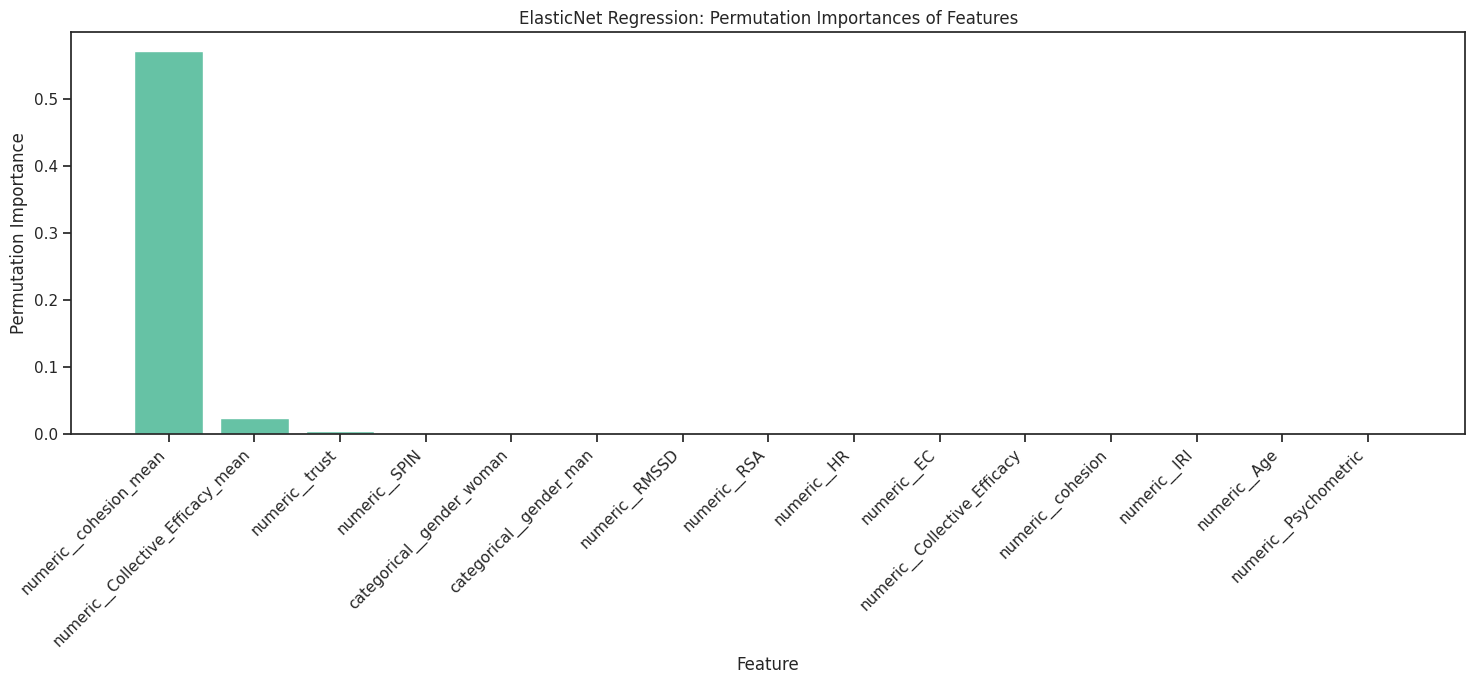

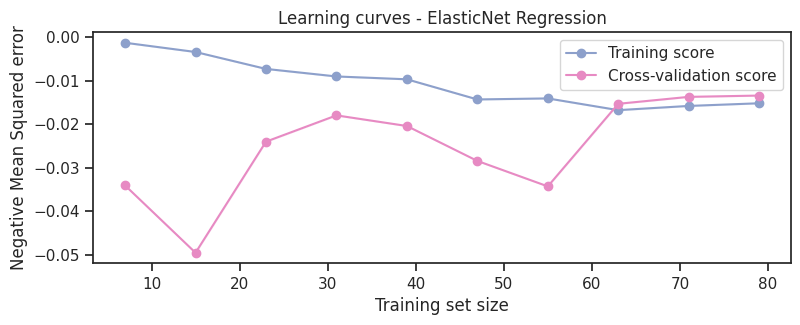

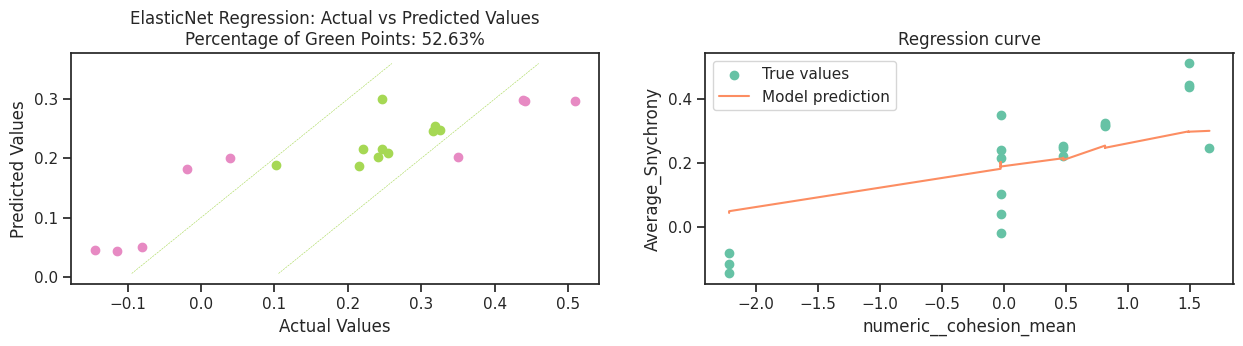

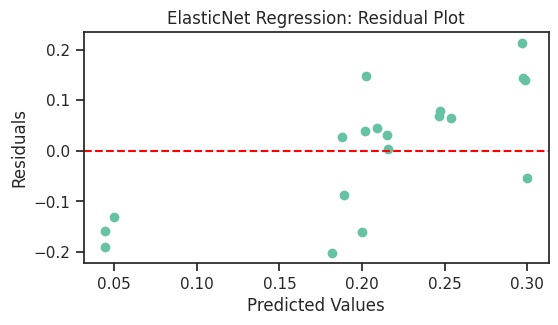

In [54]:
plot_features_importance(best_EN, 'ElasticNet Regression')
plot_learning_curves(best_EN, 'ElasticNet Regression')
actual_predict_plot(y_pred_EN, best_EN, 'ElasticNet Regression')
plot_residuals(y_pred_EN, 'ElasticNet Regression')

#### Models Comparison

In [55]:
# Ridge Regression
MSE_rr = mean_squared_error(y_test, y_pred_rr)
R2_rr = r2_score(y_test, y_pred_rr)

# SVR
MSE_svr = mean_squared_error(y_test, y_pred_svr)
R2_svr = r2_score(y_test, y_pred_svr)

# ElasticNet
MSE_EN = mean_squared_error(y_test, y_pred_EN)
R2_EN = r2_score(y_test, y_pred_EN)

In [56]:
all_results = np.array([
    ["Ridge Regression", MSE_rr, R2_rr],
    ["SVR", MSE_svr, R2_svr],
    ["ElasticNet", MSE_EN, R2_EN],
], dtype=object)

# Print the table
headers = ["Model", 'MSE', 'R²']
print(tabulate(all_results, headers=headers, tablefmt="grid"))

+------------------+-----------+----------+
| Model            |       MSE |       R² |
+==================+===========+==========+
| Ridge Regression | 0.0217912 | 0.378084 |
+------------------+-----------+----------+
| SVR              | 0.0252417 | 0.279607 |
+------------------+-----------+----------+
| ElasticNet       | 0.0148764 | 0.575432 |
+------------------+-----------+----------+


### 2.1.c Imputed dataset

#### Preprocessing

In [59]:
X_train, X_test, y_train, y_test, groups, X_scaled, y, all_groups, np_feature_names = group_split_data(df_imputation)

#### Models training

##### Ridge Regression

In [60]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100, 1000]}
rr = Ridge()

# Create a GridSearchCV object
grid_search_rr = GridSearchCV(estimator=rr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=gss_inner)

# Fit the GridSearchCV object to the data
grid_search_rr.fit(X_train, y_train, groups=groups)

# Get the best parameters from the grid search
best_params_rr = grid_search_rr.best_params_

# Create a new model with the best parameters
best_rr = Ridge(**best_params_rr)
print(f'Best Parameters: {best_params_rr}')

Best Parameters: {'alpha': 100}


In [61]:
# Fit the Ridge Regression
best_rr.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred_rr = best_rr.predict(X_test)

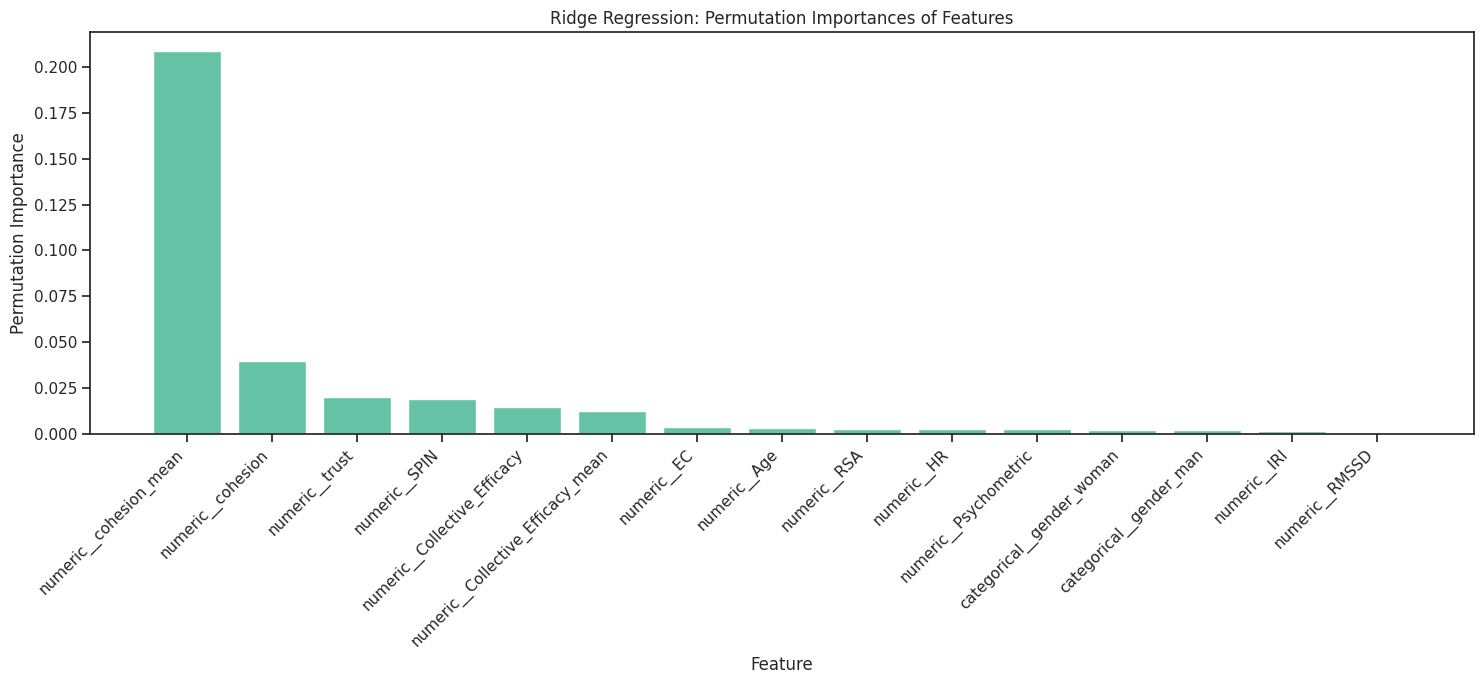

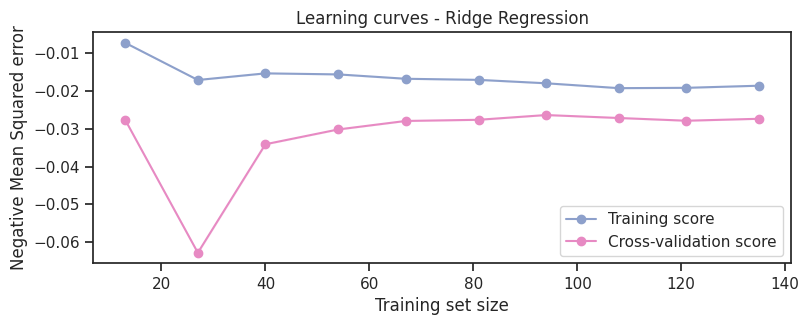

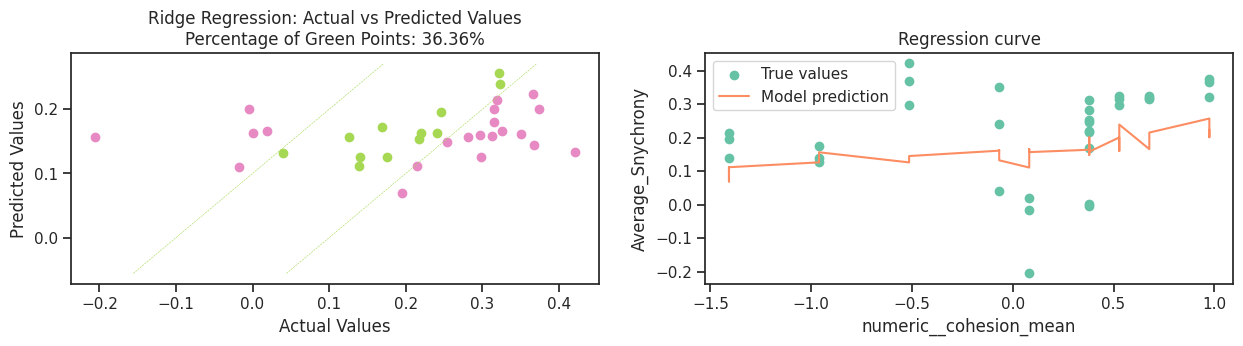

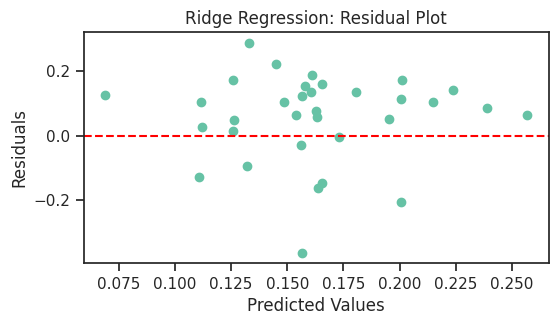

In [62]:
plot_features_importance(best_rr, 'Ridge Regression')
plot_learning_curves(best_rr, 'Ridge Regression')
actual_predict_plot(y_pred_rr, best_rr, 'Ridge Regression')
plot_residuals(y_pred_rr, 'Ridge Regression')

##### Support Vector Regression

In [63]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [0, 1, 2, 3],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=gss_inner)

grid_search_svr.fit(X_train, y_train, groups=groups)

best_svr = grid_search_svr.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_svr.best_params_)

Best Parameters: {'C': 0.01, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}


In [64]:
# Fit the svr
best_svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = best_svr.predict(X_test)

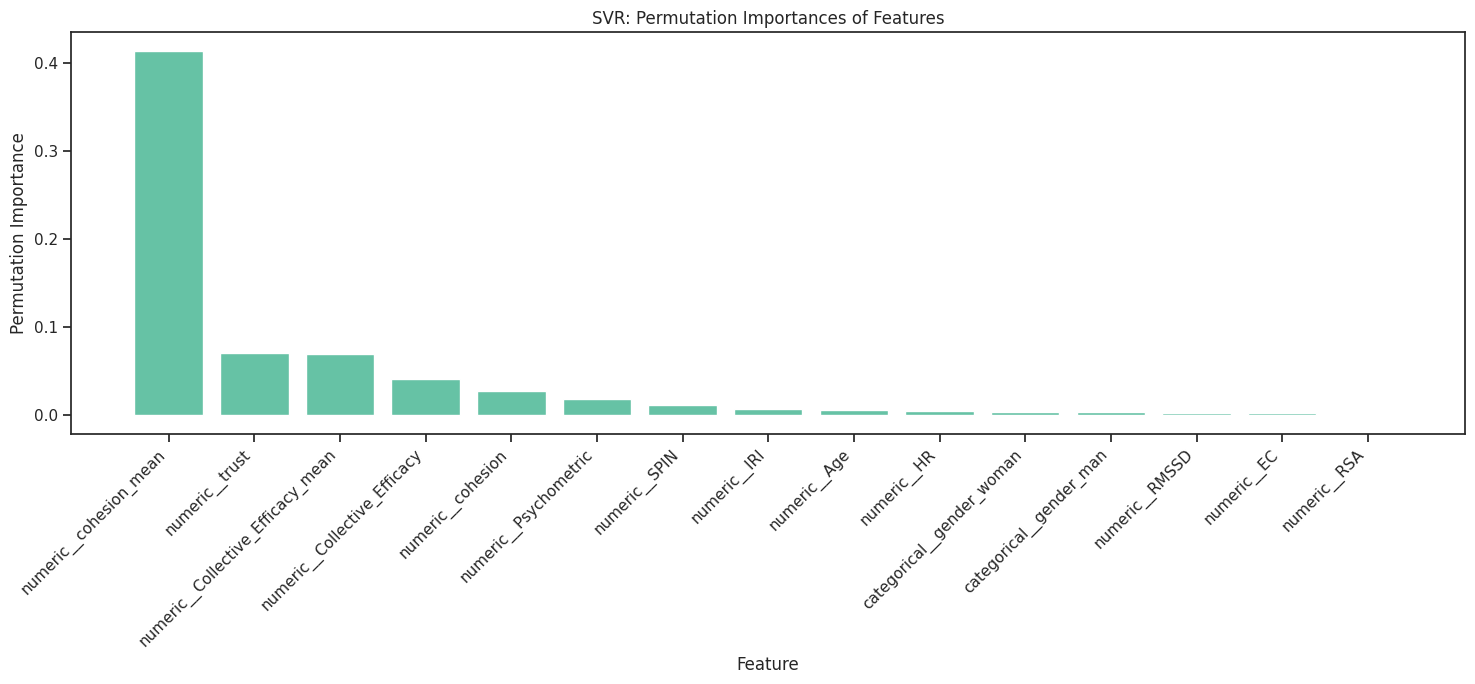

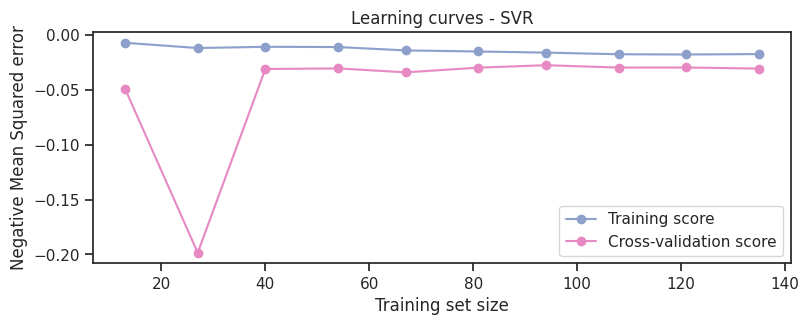

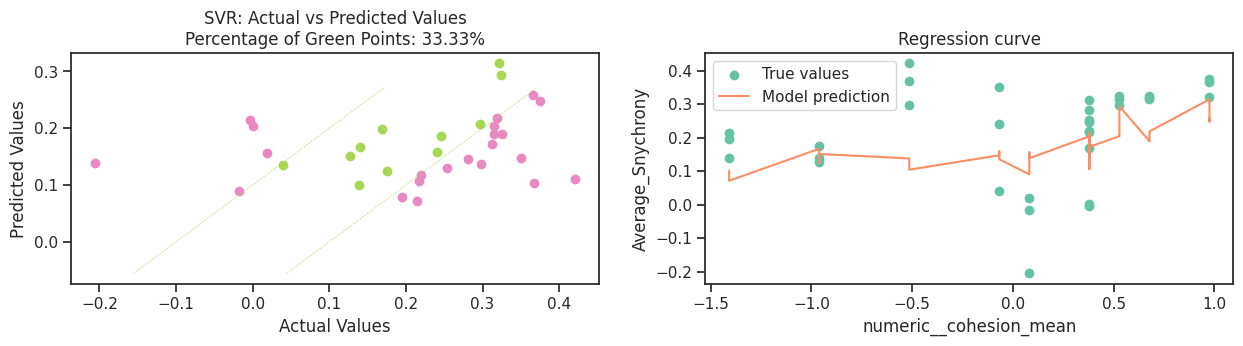

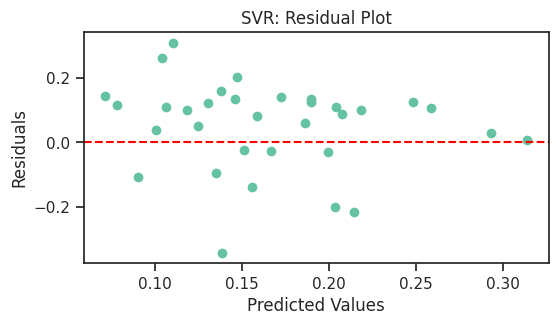

In [65]:
plot_features_importance(best_svr, 'SVR')
plot_learning_curves(best_svr, 'SVR')
actual_predict_plot(y_pred_svr, best_svr, 'SVR')
plot_residuals(y_pred_svr, 'SVR')

##### ElasticNet Regression

In [66]:
# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5],
              'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
              }
elastic_net = ElasticNet()

# Tune parameters
grid_search_EN = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=gss_inner)
grid_search_EN.fit(X_train, y_train, groups=groups)

# Get the best parameters from the grid search
best_params_EN = grid_search_EN.best_params_
print(f'Best Parameters: {best_params_EN}')

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.25}


In [67]:
# Train with the best parameters
best_EN = grid_search_EN.best_estimator_
best_EN.fit(X_train, y_train)
y_pred_EN = best_EN.predict(X_test)

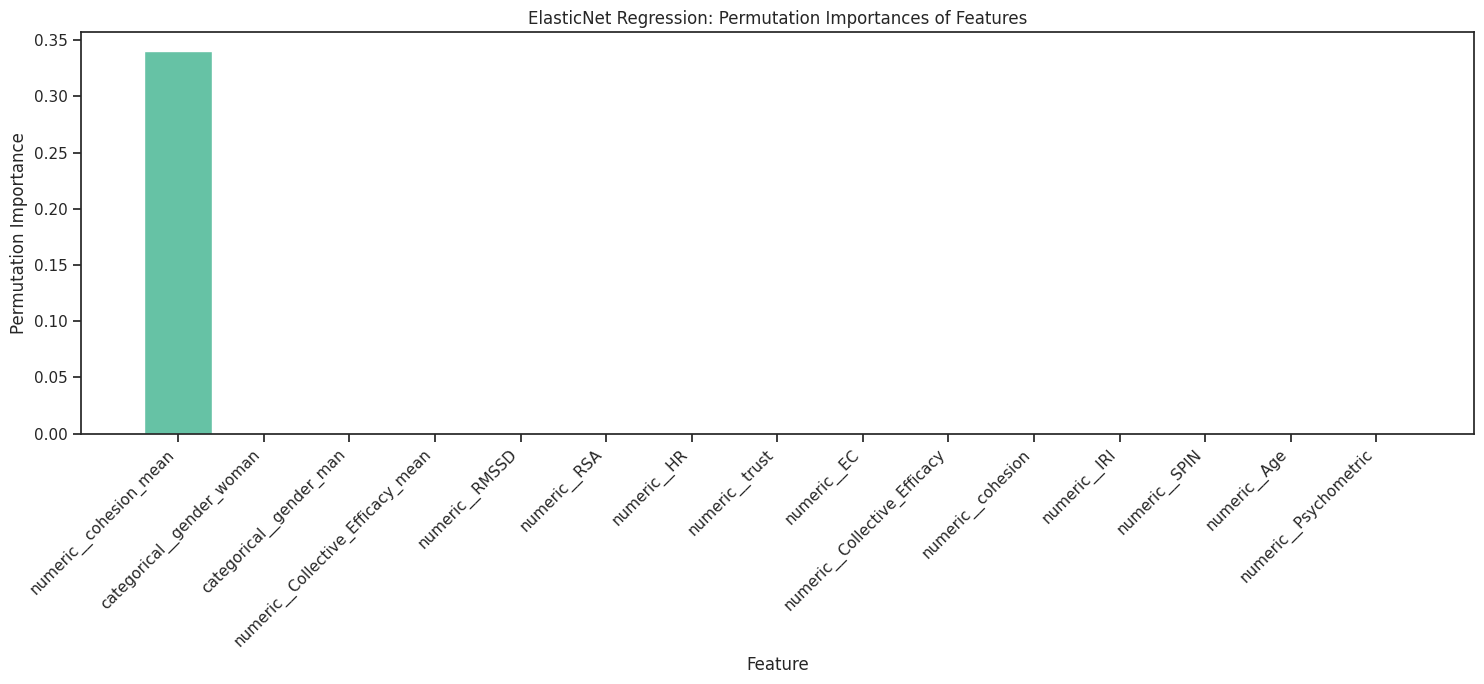

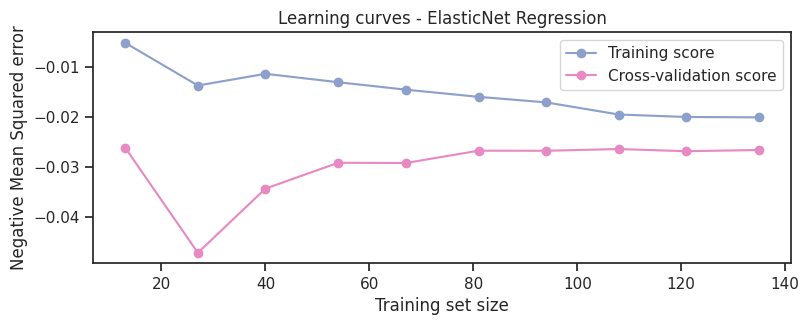

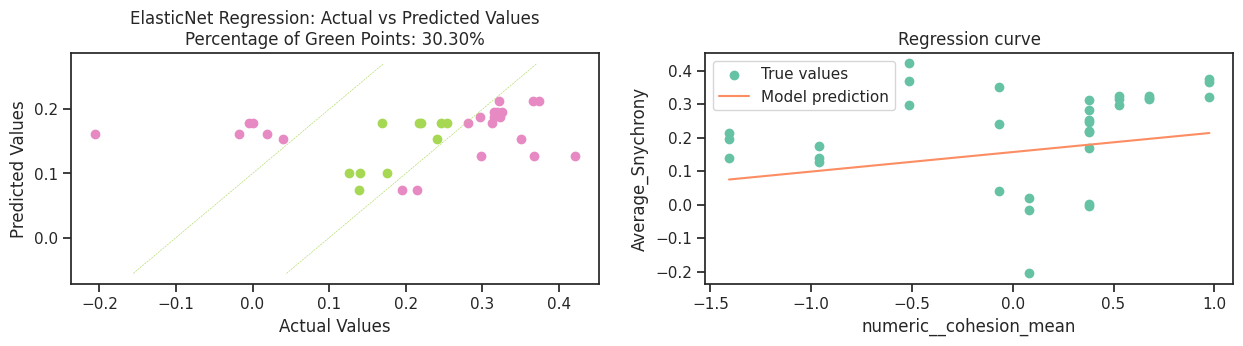

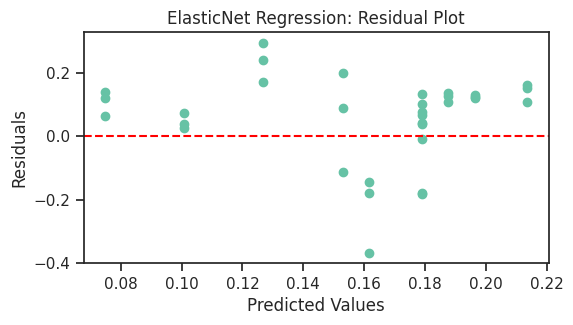

In [68]:
plot_features_importance(best_EN, 'ElasticNet Regression')
plot_learning_curves(best_EN, 'ElasticNet Regression')
actual_predict_plot(y_pred_EN, best_EN, 'ElasticNet Regression')
plot_residuals(y_pred_EN, 'ElasticNet Regression')

#### Models Comparison

In [69]:
# Ridge Regression
MSE_rr = mean_squared_error(y_test, y_pred_rr)
R2_rr = r2_score(y_test, y_pred_rr)

# SVR
MSE_svr = mean_squared_error(y_test, y_pred_svr)
R2_svr = r2_score(y_test, y_pred_svr)

# ElasticNet
MSE_EN = mean_squared_error(y_test, y_pred_EN)
R2_EN = r2_score(y_test, y_pred_EN)

In [70]:
all_results = np.array([
    ["Ridge Regression", MSE_rr, R2_rr],
    ["SVR", MSE_svr, R2_svr],
    ["ElasticNet", MSE_EN, R2_EN],
], dtype=object)

# Print the table
headers = ["Model", 'MSE', 'R²']
print(tabulate(all_results, headers=headers, tablefmt="grid"))

+------------------+-----------+------------+
| Model            |       MSE |         R² |
+==================+===========+============+
| Ridge Regression | 0.0209106 | -0.0662535 |
+------------------+-----------+------------+
| SVR              | 0.0212222 | -0.0821398 |
+------------------+-----------+------------+
| ElasticNet       | 0.0220441 | -0.124053  |
+------------------+-----------+------------+


## 2.2 Nested Cross-Validation

### 2.2.a The function

In [71]:
def My_Nested_Cross_Validation(dataset, n_splits_outer, n_splits_inner, model, param_grid, verbose=False):
  # Dataset with complete cases
  X = dataset.drop(['Average_Synchrony'], axis=1)
  y = dataset['Average_Synchrony']

  # configure the cross-validation procedure
  gss_outer = GroupShuffleSplit(n_splits=n_splits_outer, test_size=0.2, random_state=42)

  # enumerate splits
  outer_results_MSE = list()
  outer_results_R2 = list()
  outer_best_params = list()
  i=0
  for train_index, test_index in gss_outer.split(X, y, groups=X['group_number']):
    i=i+1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Pipeline for preprocessing
    pipeline = Pipeline([
          ('preprocessor', preprocessor),
      ])
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)
    X_scaled = pipeline.fit_transform(X)
    # Get the names of the features
    np_feature_names = np.array(pipeline.named_steps['preprocessor'].get_feature_names_out())
    # Convert into pd.df and get the groups and picks up groups separately
    X_train, X_test, groups, X_scaled, all_groups = convert_to_df(X_train, X_test, X_scaled)

    # Configure the inner cross-validation procedure
    gss_inner = GroupShuffleSplit(n_splits=n_splits_inner, test_size=0.1, random_state=i)

    # Tune best parameters GridSearch
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=gss_inner, refit=True)
    result = grid_search.fit(X_train, y_train, groups=groups)

    # Get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # Evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # Evaluate the model performances
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    # Store the results
    outer_results_MSE.append(MSE)
    outer_results_R2.append(R2)
    outer_best_params.append(result.best_params_)

    adjust = ' |' if R2 > 0 else '|'
    # Log
    if verbose:
      print(f"Testing: MSE={MSE:.4f}, R2={R2:.4f} {adjust} Training: neg_MSE={result.best_score_:.4f}, params={result.best_params_}     {i}")

  # Summarize the estimated performance of the model
  print('MSE mean: %.3f (%.3f)' % (mean(outer_results_MSE), std(outer_results_MSE)))
  print('R2 mean: %.3f (%.3f)' % (mean(outer_results_R2), std(outer_results_R2)))

  return outer_results_MSE, outer_results_R2, outer_best_params

In [72]:
# Some parameters
n_splits_outer=20
n_splits_inner=10

### 2.2.b Complete case

#### Ridge Regression

In [73]:
# Define the model and its parameters
rr = Ridge()
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100, 1000, 10000]}
MSE_list_rr, R2_list_rr, best_params_list_rr = My_Nested_Cross_Validation(df_cleaned, n_splits_outer, n_splits_inner, rr, param_grid)

MSE mean: 0.023 (0.013)
R2 mean: 0.143 (0.265)


In [74]:
rr_median_alpha = np.median([params['alpha'] for params in best_params_list_rr])
print(best_params_list_rr)
print(f'median alpha={rr_median_alpha}')

[{'alpha': 10}, {'alpha': 100}, {'alpha': 100}, {'alpha': 10}, {'alpha': 100}, {'alpha': 10}, {'alpha': 10}, {'alpha': 10000}, {'alpha': 10}, {'alpha': 10}, {'alpha': 10}, {'alpha': 10}, {'alpha': 100}, {'alpha': 10}, {'alpha': 100}, {'alpha': 100}, {'alpha': 100}, {'alpha': 100}, {'alpha': 10}, {'alpha': 1000}]
median alpha=55.0


#### Support Vector Regression

In [75]:
# Define the model and its parameters
svr = SVR()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [0, 1, 2, 3],
    'gamma': ['scale', 'auto', 0.1, 1]
}
MSE_list_svr, R2_list_svr, best_params_list_svr = My_Nested_Cross_Validation(df_cleaned, n_splits_outer, n_splits_inner, svr, param_grid, verbose=True)

Testing: MSE=0.0165, R2=0.5291  | Training: neg_MSE=-0.0307, params={'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}     1
Testing: MSE=0.0222, R2=-0.2457 | Training: neg_MSE=-0.0165, params={'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}     2
Testing: MSE=0.0130, R2=0.5139  | Training: neg_MSE=-0.0202, params={'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}     3
Testing: MSE=0.0248, R2=0.2397  | Training: neg_MSE=-0.0171, params={'C': 0.01, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}     4
Testing: MSE=0.0392, R2=0.1710  | Training: neg_MSE=-0.0129, params={'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}     5
Testing: MSE=0.0206, R2=-0.1323 | Training: neg_MSE=-0.0161, params={'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}     6
Testing: MSE=0.0245, R2=-0.1030 | Training: neg_MSE=-0.0157, params={'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}     7
Testing: MSE=0.0601, R2=-0.1247 | Training: neg_MSE=-0.0133, params

In [76]:
svr_median_C = median([params['C'] for params in best_params_list_svr])
svr_median_degree = median([params['degree'] for params in best_params_list_svr])
svr_most_frequent_kernel = mode([params['kernel'] for params in best_params_list_svr])
svr_most_frequent_gamma = mode([str(params['gamma']) for params in best_params_list_svr])
print(f'mean C={svr_median_C}, median degree={svr_median_degree}, mode kernel={svr_most_frequent_kernel}, mode gamma={svr_most_frequent_gamma}')

mean C=0.1, median degree=1.0, mode kernel=poly, mode gamma=auto


#### Elastic Net

In [77]:
# Define the model and its parameters
param_grid = {'alpha': [0.01, 0.1, 0.5, 1],
              'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
              }
elastic_net = ElasticNet()
MSE_list_EN, R2_list_EN, best_params_list_EN = My_Nested_Cross_Validation(df_cleaned, n_splits_outer, n_splits_inner, elastic_net, param_grid)

MSE mean: 0.022 (0.012)
R2 mean: 0.223 (0.227)


In [78]:
EN_median_alpha = median([params['alpha'] for params in best_params_list_EN])
EN_mean_l1_ratio = mean([params['l1_ratio'] for params in best_params_list_EN])
print(best_params_list_EN)
print(f'median alpha={EN_median_alpha}, mean l1_ratio={EN_mean_l1_ratio}')

[{'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.01, 'l1_ratio': 0.5}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.01, 'l1_ratio': 0.5}, {'alpha': 0.1, 'l1_ratio': 0.5}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.01, 'l1_ratio': 0.5}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.5, 'l1_ratio': 0}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.1, 'l1_ratio': 0.5}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.1, 'l1_ratio': 0}, {'alpha': 0.1, 'l1_ratio': 0.5}]
median alpha=0.1, mean l1_ratio=0.45


#### Comparison

In [79]:
all_results = np.array([
    ["Ridge Regression", mean(MSE_list_rr), mean(R2_list_rr)],
    ["SVR", mean(MSE_list_svr), mean(R2_list_svr)],
    ["ElasticNet", mean(MSE_list_EN), mean(R2_list_EN)],
], dtype=object)

# Print the table
headers = ["Model", 'MSE', 'R²']
print(tabulate(all_results, headers=headers, tablefmt="grid"))

+------------------+-----------+----------+
| Model            |       MSE |       R² |
+==================+===========+==========+
| Ridge Regression | 0.023378  | 0.142715 |
+------------------+-----------+----------+
| SVR              | 0.0237572 | 0.11851  |
+------------------+-----------+----------+
| ElasticNet       | 0.0215803 | 0.222745 |
+------------------+-----------+----------+


### 2.2.c Imputed dataset

#### Ridge Regression

In [80]:
# Define the model and its parameters
rr = Ridge()
param_grid = {'alpha': [0.1, 0.5, 1, 10, 100, 1000, 10000]}
MSE_list_rr, R2_list_rr, best_params_list_rr = My_Nested_Cross_Validation(df_imputation, n_splits_outer, n_splits_inner, rr, param_grid)

MSE mean: 0.024 (0.005)
R2 mean: -0.091 (0.383)


In [81]:
rr_median_alpha = np.median([params['alpha'] for params in best_params_list_rr])
print(best_params_list_rr)
print(f'median alpha={rr_median_alpha}')

[{'alpha': 100}, {'alpha': 10}, {'alpha': 10}, {'alpha': 100}, {'alpha': 100}, {'alpha': 100}, {'alpha': 10}, {'alpha': 100}, {'alpha': 100}, {'alpha': 10}, {'alpha': 10}, {'alpha': 1000}, {'alpha': 100}, {'alpha': 100}, {'alpha': 10}, {'alpha': 10}, {'alpha': 10}, {'alpha': 10}, {'alpha': 1}, {'alpha': 100}]
median alpha=55.0


#### Support Vector Regression

In [82]:
# Define the model and its parameters
svr = SVR()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [0, 1, 2, 3],
    'gamma': ['scale', 'auto', 0.1, 1]
}
MSE_list_svr, R2_list_svr, best_params_list_svr = My_Nested_Cross_Validation(df_imputation, n_splits_outer, n_splits_inner, svr, param_grid, verbose=True)

Testing: MSE=0.0212, R2=-0.0820 | Training: neg_MSE=-0.0244, params={'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}     1
Testing: MSE=0.0229, R2=0.0532  | Training: neg_MSE=-0.0181, params={'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}     2
Testing: MSE=0.0162, R2=-0.1088 | Training: neg_MSE=-0.0255, params={'C': 0.01, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}     3
Testing: MSE=0.0302, R2=-0.0351 | Training: neg_MSE=-0.0217, params={'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}     4
Testing: MSE=0.0250, R2=-1.3259 | Training: neg_MSE=-0.0271, params={'C': 0.1, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}     5
Testing: MSE=0.0181, R2=0.0533  | Training: neg_MSE=-0.0288, params={'C': 0.001, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}     6
Testing: MSE=0.0242, R2=-0.5370 | Training: neg_MSE=-0.0229, params={'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}     7
Testing: MSE=0.0354, R2=-0.1131 | Training: neg_MSE=-0.0223, params=

In [83]:
svr_median_C = median([params['C'] for params in best_params_list_svr])
svr_median_degree = median([params['degree'] for params in best_params_list_svr])
svr_most_frequent_kernel = mode([params['kernel'] for params in best_params_list_svr])
svr_most_frequent_gamma = mode([str(params['gamma']) for params in best_params_list_svr])
print(best_params_list_svr)
print(f'median C={svr_median_C}, median degree={svr_median_degree}, mode kernel={svr_most_frequent_kernel}, mode gamma={svr_most_frequent_gamma}')

[{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}, {'C': 0.01, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}, {'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}, {'C': 0.1, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.001, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}, {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 0, 'gamma': 'auto', 'kernel': 'rbf'}, {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}, {'C': 0.01, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}, {'C': 0.1, 'degree': 0, 'gamma': 'scale', 'kernel': 'rbf'}, {'C': 0.1, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'degree': 0, 'gamma': 'scale', 'kernel': 'rbf'}, {'C': 0.01, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}, {'C': 0.1, 'degree': 1, 'gamma': 'auto', 'kerne

#### Elastic Net

In [84]:
# Define the model and its parameters
param_grid = {'alpha': [0.01, 0.1, 0.5, 1],
              'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
              }
elastic_net = ElasticNet()
MSE_list_EN, R2_list_EN, best_params_list_EN = My_Nested_Cross_Validation(df_imputation, n_splits_outer, n_splits_inner, elastic_net, param_grid)

MSE mean: 0.024 (0.005)
R2 mean: -0.076 (0.364)


In [85]:
EN_median_alpha = median([params['alpha'] for params in best_params_list_EN])
EN_mean_l1_ratio = mean([params['l1_ratio'] for params in best_params_list_EN])
print(best_params_list_EN)
print(f'median alpha={EN_median_alpha}, mean l1_ratio={EN_mean_l1_ratio}')

[{'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.01, 'l1_ratio': 0.75}, {'alpha': 0.1, 'l1_ratio': 0}, {'alpha': 1, 'l1_ratio': 0}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.01, 'l1_ratio': 0.75}, {'alpha': 1, 'l1_ratio': 0}, {'alpha': 0.1, 'l1_ratio': 0}, {'alpha': 0.1, 'l1_ratio': 0}, {'alpha': 0.5, 'l1_ratio': 0.25}, {'alpha': 1, 'l1_ratio': 0}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.1, 'l1_ratio': 0.25}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.01, 'l1_ratio': 1}, {'alpha': 0.01, 'l1_ratio': 0.25}, {'alpha': 0.01, 'l1_ratio': 0.5}, {'alpha': 0.1, 'l1_ratio': 0.25}]
median alpha=0.055, mean l1_ratio=0.4625


#### Comparison

In [86]:
all_results = np.array([
    ["Ridge Regression", mean(MSE_list_rr), mean(R2_list_rr)],
    ["SVR", mean(MSE_list_svr), mean(R2_list_svr)],
    ["ElasticNet", mean(MSE_list_EN), mean(R2_list_EN)],
], dtype=object)

# Print the table
headers = ["Model", 'MSE', 'R²']
print(tabulate(all_results, headers=headers, tablefmt="grid"))

+------------------+-----------+------------+
| Model            |       MSE |         R² |
+==================+===========+============+
| Ridge Regression | 0.0239146 | -0.0910207 |
+------------------+-----------+------------+
| SVR              | 0.0250237 | -0.133433  |
+------------------+-----------+------------+
| ElasticNet       | 0.0236525 | -0.0764187 |
+------------------+-----------+------------+
